          split   count  avg_height  avg_width  mean_pixel  std_pixel
0  train_sketch   79529       256.0      256.0  245.234756  39.264853
1   train_photo   79529       256.0      256.0  112.874596  57.603022
2   test_sketch  158578       256.0      256.0  245.254123  39.308617
3    test_photo  158578       256.0      256.0  112.200757  57.324125


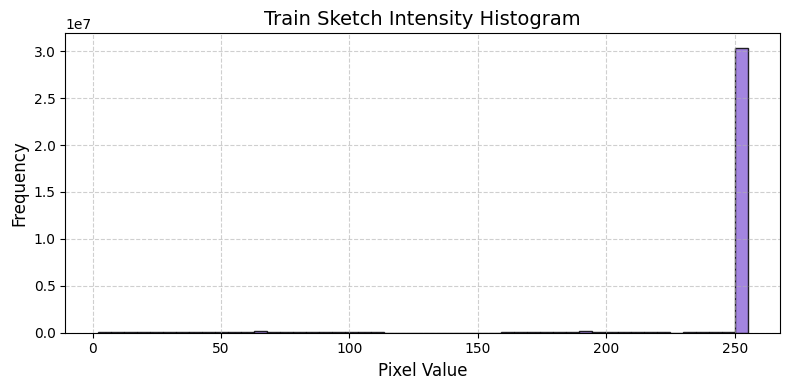

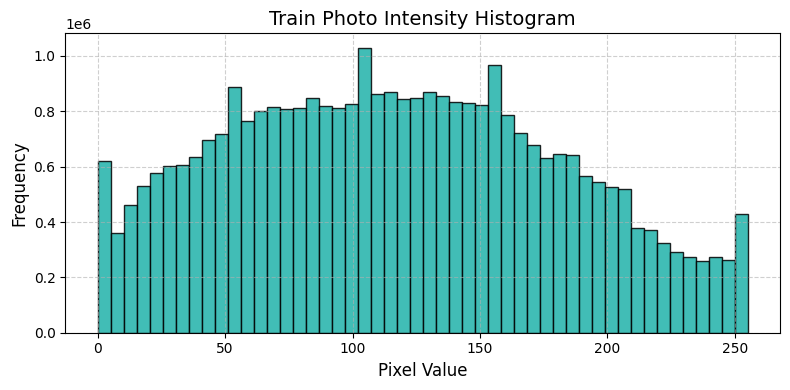

In [7]:
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Directories
train_sketch_dir = "processed_dataset_1/train/sketch"
train_photo_dir  = "processed_dataset_1/train/photo"
test_sketch_dir  = "processed_dataset_1/test/sketch"
test_photo_dir   = "processed_dataset_1/test/photo"

# 1) Summary Statistics
def gather_stats(folder, grayscale=False, sample_limit=1000):
    files = [f for f in os.listdir(folder) if not f.startswith('.')]
    count = len(files)
    heights, widths, means, stds = [], [], [], []
    sample_files = random.sample(files, min(sample_limit, count))
    for fname in sample_files:
        img_path = os.path.join(folder, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
        if img is None: continue
        h, w = img.shape[:2]
        heights.append(h); widths.append(w)
        means.append(img.mean())
        stds.append(img.std())
    return {
        "count": count,
        "avg_height": np.mean(heights),
        "avg_width":  np.mean(widths),
        "mean_pixel": np.mean(means),
        "std_pixel":  np.mean(stds)
    }

stats = []
for split, folder, gray in [
    ("train_sketch", train_sketch_dir, True),
    ("train_photo",  train_photo_dir, False),
    ("test_sketch",  test_sketch_dir, True),
    ("test_photo",   test_photo_dir, False),
]:
    s = gather_stats(folder, grayscale=gray)
    s["split"] = split
    stats.append(s)

df = pd.DataFrame(stats)[["split","count","avg_height","avg_width","mean_pixel","std_pixel"]]
print(df)

def plot_histogram(folder, grayscale=True, title="", color='skyblue'):
    files = random.sample([f for f in os.listdir(folder) if not f.startswith('.')], 500)
    vals = []
    for fname in files:
        img_path = os.path.join(folder, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
        if img is None: continue
        if not grayscale:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        vals.append(img.flatten())
    vals = np.concatenate(vals)

    plt.figure(figsize=(8, 4))
    plt.hist(vals, bins=50, color=color, edgecolor='black', alpha=0.85)
    plt.title(title, fontsize=14)
    plt.xlabel("Pixel Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Separate calls
plot_histogram(train_sketch_dir, True,  "Train Sketch Intensity Histogram", color='#9370DB')  # Purple-ish
plot_histogram(train_photo_dir, False, "Train Photo Intensity Histogram", color='#20B2AA')    # Teal-ish


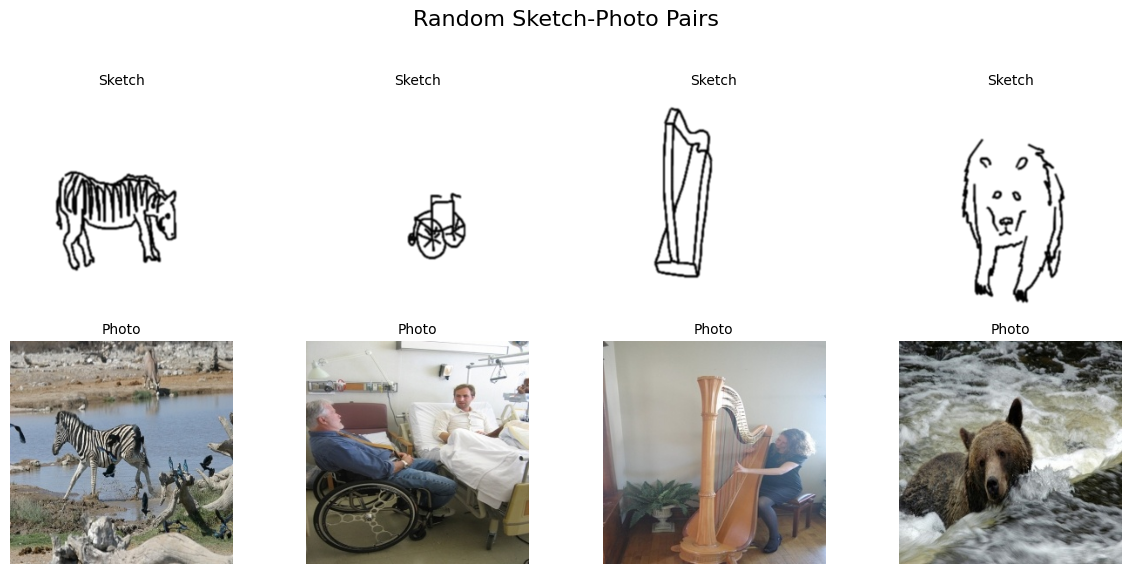

In [8]:
def show_grid(sketch_folder, photo_folder, n=4):
    samples = random.sample([f for f in os.listdir(sketch_folder) if f.endswith('.png')], n)
    plt.figure(figsize=(3 * n, 6))
    for i, fname in enumerate(samples):
        # Sketch
        plt.subplot(2, n, i + 1)
        sk = Image.open(os.path.join(sketch_folder, fname)).convert("L")
        plt.imshow(sk, cmap='gray')
        plt.title("Sketch", fontsize=10)
        plt.axis('off')
        
        # Photo
        plt.subplot(2, n, i + 1 + n)
        ph = Image.open(os.path.join(photo_folder, fname.replace(".png", ".jpg"))).convert("RGB")
        plt.imshow(ph)
        plt.title("Photo", fontsize=10)
        plt.axis('off')
        
    plt.suptitle("Random Sketch-Photo Pairs", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

show_grid(train_sketch_dir, train_photo_dir, n=4)



▶ Extracted feature snapshot:
      sk_mean     sk_std  sk_edge_density   ph_mean_R   ph_mean_G   ph_mean_B  \
0  244.654190  41.610694         0.033112  144.546204  121.247528   64.108490   
1  247.279160  36.471400         0.022598  127.584824  125.370865  120.246460   
2  241.767960  46.465553         0.040863  138.284241  152.293365  153.022842   
3  245.381760  39.655274         0.030304  116.085983  104.809708  100.044052   
4  245.457703  41.240808         0.025299  108.156281  106.927719   32.791336   

    ph_std_R   ph_std_G   ph_std_B    filename  
0  47.517592  45.288371  37.129985  191830.png  
1  89.839097  90.162577  89.031871  219648.png  
2  95.953152  84.314281  91.916330  181565.png  
3  53.283369  49.482813  48.075053  142940.png  
4  66.413413  71.474427  32.323581  160455.png  

▶ Summary statistics:
                 count        mean        std         min         25%  \
sk_mean          500.0  245.350144   5.185387  208.284210  243.076855   
sk_std           50

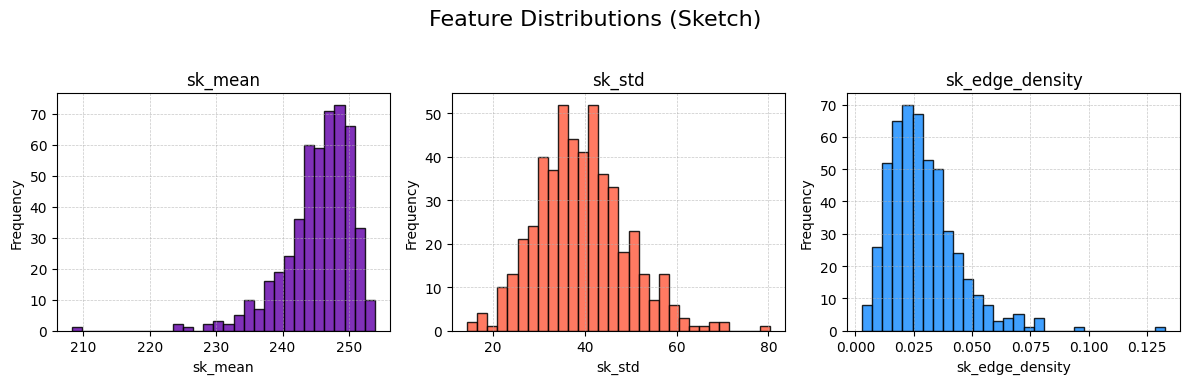

In [3]:
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# ─── 1) Configure Paths ────────────────────
train_sketch_dir = r"C:\Users\Suyash Tambe\Desktop\sketch-photo\processed_dataset_1\train\sketch"
train_photo_dir  = r"C:\Users\Suyash Tambe\Desktop\sketch-photo\processed_dataset_1\train\photo"

# ─── 2) Feature Extraction ────────────────
def extract_features(sketch_path, photo_path):
    # --- Sketch features (grayscale) ---
    sketch = cv2.imread(sketch_path, cv2.IMREAD_GRAYSCALE)
    sk_mean = float(np.mean(sketch))
    sk_std  = float(np.std(sketch))
    edges   = cv2.Canny(sketch, 100, 200)
    sk_edge_density = float((edges>0).sum() / edges.size)
    
    # --- Photo features (RGB) ---
    photo = cv2.imread(photo_path, cv2.IMREAD_COLOR)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    # per‐channel mean & std
    ch_means = photo.reshape(-1,3).mean(axis=0)
    ch_stds  = photo.reshape(-1,3).std(axis=0)
    
    return {
        "sk_mean": sk_mean,
        "sk_std": sk_std,
        "sk_edge_density": sk_edge_density,
        "ph_mean_R": float(ch_means[0]),
        "ph_mean_G": float(ch_means[1]),
        "ph_mean_B": float(ch_means[2]),
        "ph_std_R":  float(ch_stds[0]),
        "ph_std_G":  float(ch_stds[1]),
        "ph_std_B":  float(ch_stds[2]),
    }

# ─── 3) Sample and Build DataFrame ────────
all_sketches = [f for f in os.listdir(train_sketch_dir) if f.endswith('.png')]
sampled = random.sample(all_sketches, min(500, len(all_sketches)))

features = []
for fname in sampled:
    sk = os.path.join(train_sketch_dir, fname)
    ph = os.path.join(train_photo_dir, fname.replace('.png', '.jpg'))
    if os.path.exists(ph):
        feats = extract_features(sk, ph)
        feats["filename"] = fname
        features.append(feats)

df = pd.DataFrame(features)
print("\n▶ Extracted feature snapshot:")
print(df.head())

# ─── 4) Summary Statistics ────────────────
print("\n▶ Summary statistics:")
print(df.describe().T)


# ─── 5) Feature Distributions ────────────
cols = ["sk_mean","sk_std","sk_edge_density","ph_mean_R","ph_mean_G","ph_mean_B"]
colors = ['#6a0dad', '#ff6347', '#1e90ff', '#3cb371', '#ffa500', '#ff1493']  # custom colors


# First set of 3 plots
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[cols[i]], bins=30, color=colors[i], edgecolor='black', alpha=0.85)
    plt.title(cols[i])
    plt.xlabel(cols[i])                # ← X-axis label
    plt.ylabel("Frequency")           # ← Y-axis label
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.suptitle("Feature Distributions (Sketch)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





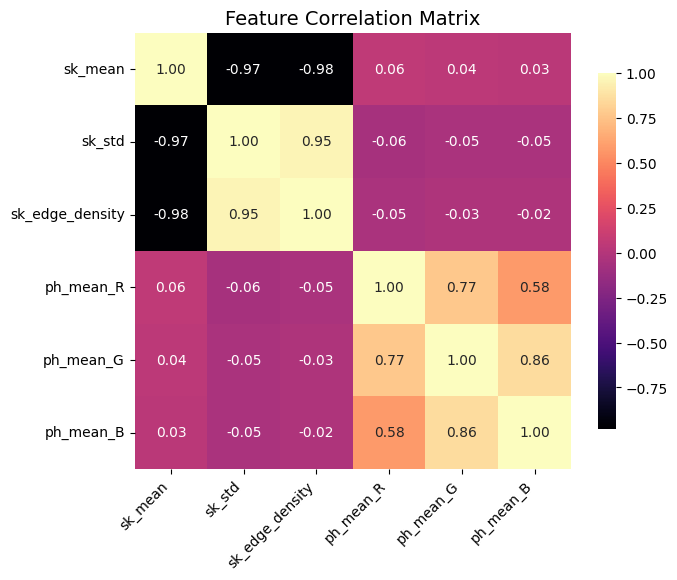

In [5]:
# ─── 6) Correlation Heatmap ─────────────
import seaborn as sns

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='magma', square=True, cbar_kws={"shrink": 0.75})
plt.title("Feature Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

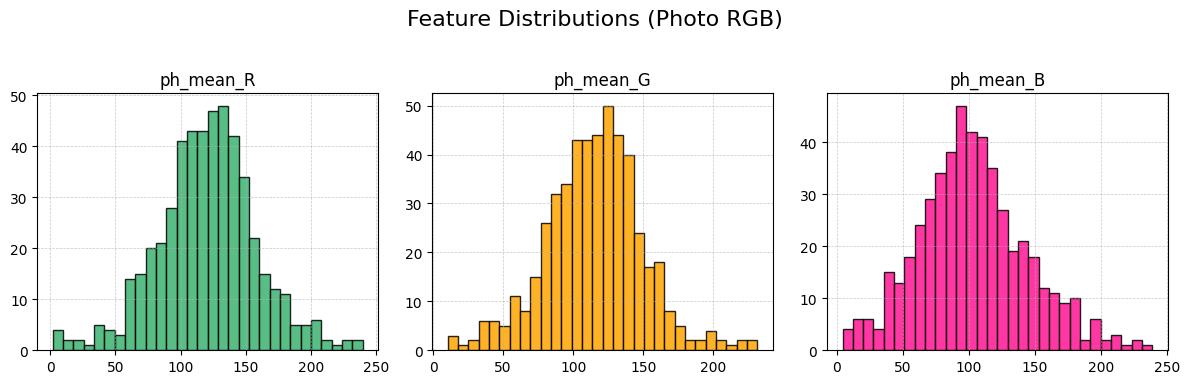

In [6]:
# Second set of 3 plots
plt.figure(figsize=(12, 4))
for i in range(3, 6):
    plt.subplot(1, 3, i - 2)
    plt.hist(df[cols[i]], bins=30, color=colors[i], edgecolor='black', alpha=0.85)
    plt.title(cols[i])
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.suptitle("Feature Distributions (Photo RGB)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()